In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [67]:
df = pd.read_csv('loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


* A number of features have missing values

In [69]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [70]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

##### Data Preprocessing

In [71]:
for c in df.columns:
    if df[c].dtype == 'object':
        print(df[c].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Status
Y    422
N    192
Name: count, dtype: int64


* The dataset has features with missing values and they will be filled
* The categorical features will be filled with the mode and the numerical will be filled with the median

In [72]:
df.Gender.fillna('Male',inplace = True)
df.Married.fillna("Yes",
                 inplace = True)
df.Dependents.fillna("0",
                    inplace = True)
df.Self_Employed.fillna("No",
                       inplace = True)


In [73]:
df[df.Coapplicant_Income==0].head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
15,Male,No,0,Graduate,No,495000,0.0,12500000,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,359600,0.0,10000000,240.0,NaN,Urban,Y


In [74]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [75]:
df.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [76]:
#df.Credit_History.median()
#df.Term.median()

In [77]:
df.Credit_History.fillna(1,
                         inplace = True)
df.Term.fillna(360,
              inplace = True)

In [78]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [80]:
df1 = df.copy()

##### Exploratory Data Analysis

<Axes: ylabel='Gender'>

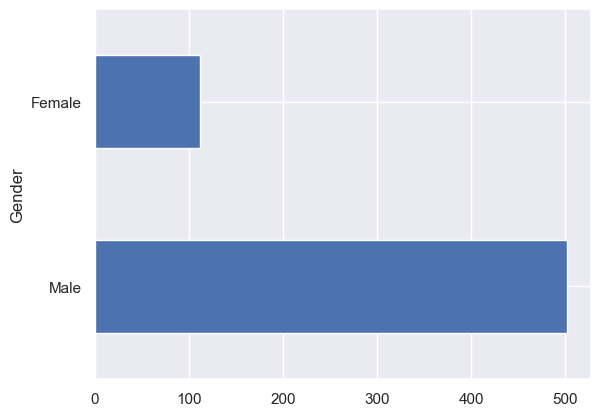

In [81]:
df.Gender.value_counts().plot.barh()
#plt.xticks(0)

<Axes: ylabel='Area'>

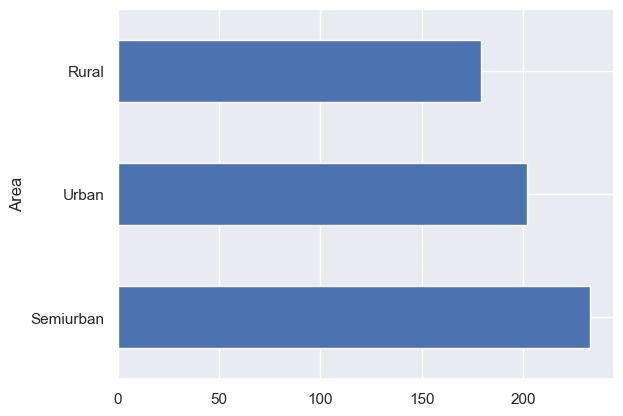

In [82]:
df.Area.value_counts().plot.barh()

<Axes: ylabel='Married'>

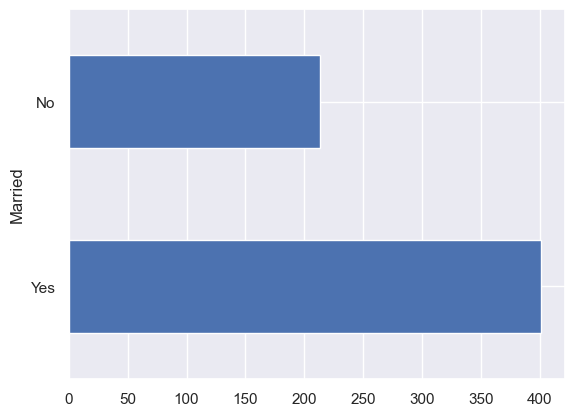

In [83]:
df.Married.value_counts().plot.barh()

<Axes: ylabel='Education'>

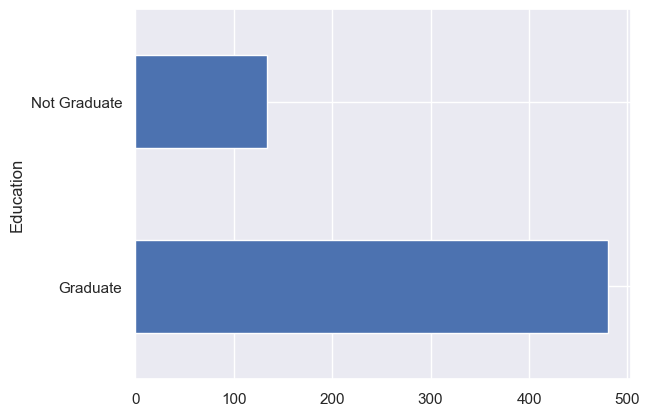

In [84]:
df.Education.value_counts().plot.barh()

<Axes: ylabel='Self_Employed'>

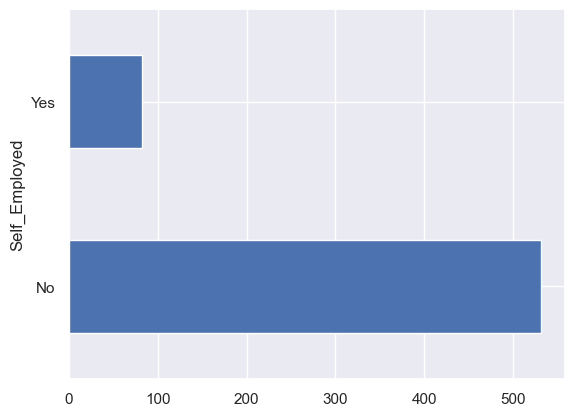

In [85]:
df.Self_Employed.value_counts().plot.barh()

<Axes: ylabel='Dependents'>

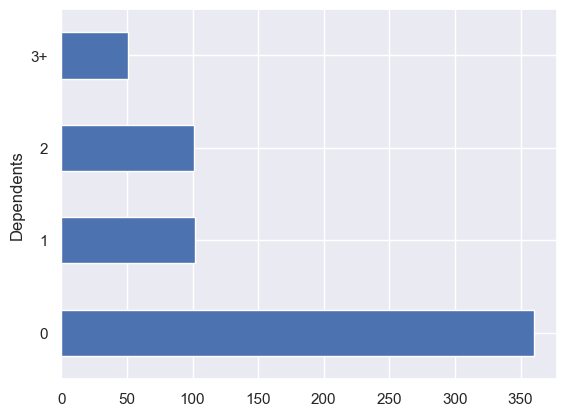

In [86]:
df.Dependents.value_counts().plot.barh()

In [87]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


* Applicant_Income vs Coapplicant_Income

C:\Users\Public\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


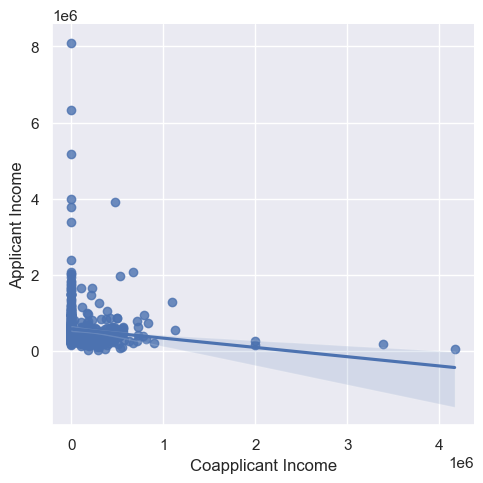

In [88]:
sns.lmplot(x = 'Coapplicant_Income',y = 'Applicant_Income', data =df)
plt.ylabel('Applicant Income')
plt.xlabel('Coapplicant Income')
plt.show()

In [89]:
#the target feature 'status' has values Y and N, i will replace these values with 1 and 0
df.Status.replace({
    'Y':1,
    'N':0
}, inplace = True)

In [90]:
df1 = df.copy()

In [91]:
df1.replace({'Yes':1,
           'No':0},
          inplace = True)

In [92]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,0,0,Graduate,0,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0,600000,0.0,14100000,360.0,1.0,Urban,1


In [93]:
cat_columns = []
for c in df1.columns:
    if df1[c].dtype == 'object':
        cat_columns.append(c)
        
cat_columns

['Gender', 'Dependents', 'Education', 'Area']

In [94]:
ohe = OneHotEncoder(drop = 'first')
#ohe.get_feature_names_out
ohe_transform = ohe.fit_transform(df1[cat_columns])
ohe_transform
#the encoded data is stored in a matrix
dense_df = ohe_transform.todense() #the matrix is turned dense
df_todense = pd.DataFrame(dense_df, columns = ohe.get_feature_names_out()) #the densed data is turned into a dataframe

df1 = pd.concat([df1,df_todense],
               axis = 1)
df1.drop(cat_columns,axis = 1,inplace =True)
df1

#df1 = pd.concat([df1,ohe_transform],
               #axis = 1)

#df1.drop(cat_columns,axis = 1, inplace = True)
#df1.head()

,Married,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Status,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Area_Semiurban,Area_Urban
0,0,0,584900,0.0,15000000,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,458300,150800.0,12800000,360.0,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1,300000,0.0,6600000,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,258300,235800.0,12000000,360.0,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,0,600000,0.0,14100000,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,290000,0.0,7100000,360.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,1,0,410600,0.0,4000000,180.0,1.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
611,1,0,807200,24000.0,25300000,360.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
612,1,0,758300,0.0,18700000,360.0,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [95]:
ohe.get_feature_names_out()

array(['Gender_Male', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Area_Semiurban', 'Area_Urban'],
      dtype=object)

In [96]:
pickle.dump(ohe,open('encoder.pkl','wb'))

In [97]:
x = df1.drop(['Status'],
            axis = 1)
y = df1.Status

In [98]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
scaler = StandardScaler()
x_scaled = scaler.fit(x)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()

,Married,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Area_Semiurban,Area_Urban
0,-1.372089,-0.392601,0.072991,-0.554487,0.097515,0.273231,0.411733,0.472343,-0.446339,-0.443713,-0.300975,-0.528362,-0.782016,1.428147
1,0.728816,-0.392601,-0.134412,-0.038732,-0.152244,0.273231,0.411733,0.472343,2.240448,-0.443713,-0.300975,-0.528362,-0.782016,-0.700208
2,0.728816,2.547117,-0.393747,-0.554487,-0.856110,0.273231,0.411733,0.472343,-0.446339,-0.443713,-0.300975,-0.528362,-0.782016,1.428147
3,0.728816,-0.392601,-0.462062,0.251980,-0.243065,0.273231,0.411733,0.472343,-0.446339,-0.443713,-0.300975,1.892641,-0.782016,1.428147
4,-1.372089,-0.392601,0.097728,-0.554487,-0.004659,0.273231,0.411733,0.472343,-0.446339,-0.443713,-0.300975,-0.528362,-0.782016,1.428147


In [99]:
pickle.dump(scaler,open('scal.pkl','wb'))

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [101]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

In [102]:
models = {'RandomForestClassifier':RandomForestClassifier(),
         'LogisticRegression':LogisticRegression(),
         'DecisionTreeClassifier':DecisionTreeClassifier(),
         'Adaboost':AdaBoostClassifier(),
         'Gradientboost':GradientBoostingClassifier(),
         'catboost':CatBoostClassifier(),
         'xgboost':XGBClassifier(),
         #'xgbrf':XGBRFClassifier(),
         'ExtraTree':ExtraTreeClassifier(),
         'BaggingClassifier':BaggingClassifier()}




def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]= model.score(x_test,y_test)
    return model_scores

In [103]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.007994
0:	learn: 0.6886659	total: 14.5ms	remaining: 14.5s
1:	learn: 0.6844382	total: 21.3ms	remaining: 10.6s
2:	learn: 0.6802620	total: 27.5ms	remaining: 9.13s
3:	learn: 0.6759150	total: 33.2ms	remaining: 8.26s
4:	learn: 0.6714537	total: 39ms	remaining: 7.76s
5:	learn: 0.6672426	total: 47.3ms	remaining: 7.84s
6:	learn: 0.6628860	total: 51.6ms	remaining: 7.32s
7:	learn: 0.6591107	total: 54.3ms	remaining: 6.73s
8:	learn: 0.6553148	total: 59.5ms	remaining: 6.55s
9:	learn: 0.6516167	total: 64ms	remaining: 6.33s
10:	learn: 0.6480103	total: 67.4ms	remaining: 6.06s
11:	learn: 0.6444574	total: 70.7ms	remaining: 5.82s
12:	learn: 0.6403711	total: 78.5ms	remaining: 5.96s
13:	learn: 0.6366557	total: 82.9ms	remaining: 5.84s
14:	learn: 0.6329832	total: 86.2ms	remaining: 5.66s
15:	learn: 0.6295475	total: 92.4ms	remaining: 5.68s
16:	learn: 0.6262218	total: 96.2ms	remaining: 5.56s
17:	learn: 0.6229653	total: 99.6ms	remaining: 5.43s
18:	learn: 0.6196406	total: 102ms	remaining: 5.2

194:	learn: 0.4095395	total: 783ms	remaining: 3.23s
195:	learn: 0.4092102	total: 787ms	remaining: 3.23s
196:	learn: 0.4085430	total: 795ms	remaining: 3.24s
197:	learn: 0.4080440	total: 800ms	remaining: 3.24s
198:	learn: 0.4075427	total: 807ms	remaining: 3.25s
199:	learn: 0.4069825	total: 812ms	remaining: 3.25s
200:	learn: 0.4065961	total: 818ms	remaining: 3.25s
201:	learn: 0.4062505	total: 832ms	remaining: 3.29s
202:	learn: 0.4059387	total: 836ms	remaining: 3.28s
203:	learn: 0.4056279	total: 844ms	remaining: 3.29s
204:	learn: 0.4052556	total: 849ms	remaining: 3.29s
205:	learn: 0.4049036	total: 852ms	remaining: 3.28s
206:	learn: 0.4048243	total: 856ms	remaining: 3.28s
207:	learn: 0.4044585	total: 861ms	remaining: 3.28s
208:	learn: 0.4041379	total: 865ms	remaining: 3.27s
209:	learn: 0.4039329	total: 867ms	remaining: 3.26s
210:	learn: 0.4036866	total: 871ms	remaining: 3.26s
211:	learn: 0.4032677	total: 876ms	remaining: 3.25s
212:	learn: 0.4029532	total: 879ms	remaining: 3.25s
213:	learn: 

359:	learn: 0.3589554	total: 1.39s	remaining: 2.47s
360:	learn: 0.3585191	total: 1.39s	remaining: 2.46s
361:	learn: 0.3582798	total: 1.4s	remaining: 2.46s
362:	learn: 0.3580840	total: 1.4s	remaining: 2.46s
363:	learn: 0.3577573	total: 1.4s	remaining: 2.45s
364:	learn: 0.3576247	total: 1.41s	remaining: 2.45s
365:	learn: 0.3575179	total: 1.41s	remaining: 2.44s
366:	learn: 0.3573378	total: 1.41s	remaining: 2.44s
367:	learn: 0.3571133	total: 1.42s	remaining: 2.43s
368:	learn: 0.3567894	total: 1.42s	remaining: 2.42s
369:	learn: 0.3565256	total: 1.42s	remaining: 2.42s
370:	learn: 0.3563096	total: 1.42s	remaining: 2.42s
371:	learn: 0.3560719	total: 1.43s	remaining: 2.41s
372:	learn: 0.3560282	total: 1.43s	remaining: 2.4s
373:	learn: 0.3557060	total: 1.43s	remaining: 2.4s
374:	learn: 0.3554377	total: 1.44s	remaining: 2.39s
375:	learn: 0.3553186	total: 1.44s	remaining: 2.39s
376:	learn: 0.3549504	total: 1.44s	remaining: 2.38s
377:	learn: 0.3547828	total: 1.44s	remaining: 2.38s
378:	learn: 0.354

519:	learn: 0.3242317	total: 1.98s	remaining: 1.82s
520:	learn: 0.3241905	total: 1.98s	remaining: 1.82s
521:	learn: 0.3240690	total: 1.99s	remaining: 1.82s
522:	learn: 0.3238622	total: 1.99s	remaining: 1.81s
523:	learn: 0.3236988	total: 1.99s	remaining: 1.81s
524:	learn: 0.3235340	total: 2s	remaining: 1.81s
525:	learn: 0.3233891	total: 2s	remaining: 1.8s
526:	learn: 0.3231414	total: 2s	remaining: 1.8s
527:	learn: 0.3230968	total: 2.01s	remaining: 1.79s
528:	learn: 0.3228585	total: 2.01s	remaining: 1.79s
529:	learn: 0.3226129	total: 2.02s	remaining: 1.79s
530:	learn: 0.3222516	total: 2.02s	remaining: 1.78s
531:	learn: 0.3220289	total: 2.03s	remaining: 1.78s
532:	learn: 0.3219093	total: 2.03s	remaining: 1.78s
533:	learn: 0.3214656	total: 2.03s	remaining: 1.77s
534:	learn: 0.3213034	total: 2.04s	remaining: 1.77s
535:	learn: 0.3211676	total: 2.04s	remaining: 1.77s
536:	learn: 0.3209612	total: 2.05s	remaining: 1.76s
537:	learn: 0.3206912	total: 2.05s	remaining: 1.76s
538:	learn: 0.3204893	t

678:	learn: 0.2948570	total: 2.56s	remaining: 1.21s
679:	learn: 0.2947785	total: 2.57s	remaining: 1.21s
680:	learn: 0.2946072	total: 2.57s	remaining: 1.21s
681:	learn: 0.2943863	total: 2.58s	remaining: 1.2s
682:	learn: 0.2942749	total: 2.58s	remaining: 1.2s
683:	learn: 0.2941024	total: 2.59s	remaining: 1.19s
684:	learn: 0.2938720	total: 2.59s	remaining: 1.19s
685:	learn: 0.2938024	total: 2.59s	remaining: 1.19s
686:	learn: 0.2935619	total: 2.6s	remaining: 1.18s
687:	learn: 0.2933850	total: 2.6s	remaining: 1.18s
688:	learn: 0.2931901	total: 2.61s	remaining: 1.18s
689:	learn: 0.2929394	total: 2.61s	remaining: 1.17s
690:	learn: 0.2927987	total: 2.62s	remaining: 1.17s
691:	learn: 0.2925941	total: 2.62s	remaining: 1.17s
692:	learn: 0.2924966	total: 2.62s	remaining: 1.16s
693:	learn: 0.2922669	total: 2.63s	remaining: 1.16s
694:	learn: 0.2920705	total: 2.63s	remaining: 1.15s
695:	learn: 0.2918422	total: 2.64s	remaining: 1.15s
696:	learn: 0.2916343	total: 2.64s	remaining: 1.15s
697:	learn: 0.29

897:	learn: 0.2576226	total: 3.29s	remaining: 374ms
898:	learn: 0.2573891	total: 3.29s	remaining: 370ms
899:	learn: 0.2572750	total: 3.3s	remaining: 367ms
900:	learn: 0.2570512	total: 3.3s	remaining: 363ms
901:	learn: 0.2569041	total: 3.31s	remaining: 359ms
902:	learn: 0.2566348	total: 3.31s	remaining: 356ms
903:	learn: 0.2564154	total: 3.32s	remaining: 352ms
904:	learn: 0.2563291	total: 3.32s	remaining: 348ms
905:	learn: 0.2562860	total: 3.32s	remaining: 345ms
906:	learn: 0.2562654	total: 3.33s	remaining: 341ms
907:	learn: 0.2560812	total: 3.33s	remaining: 337ms
908:	learn: 0.2559175	total: 3.33s	remaining: 334ms
909:	learn: 0.2555895	total: 3.33s	remaining: 330ms
910:	learn: 0.2554998	total: 3.34s	remaining: 326ms
911:	learn: 0.2554239	total: 3.34s	remaining: 322ms
912:	learn: 0.2552021	total: 3.35s	remaining: 319ms
913:	learn: 0.2551110	total: 3.35s	remaining: 315ms
914:	learn: 0.2550522	total: 3.35s	remaining: 311ms
915:	learn: 0.2549144	total: 3.35s	remaining: 308ms
916:	learn: 0.

{'RandomForestClassifier': 0.7419354838709677,
 'LogisticRegression': 0.6612903225806451,
 'DecisionTreeClassifier': 0.6451612903225806,
 'Adaboost': 0.7419354838709677,
 'Gradientboost': 0.7258064516129032,
 'catboost': 0.7419354838709677,
 'xgboost': 0.7096774193548387,
 'ExtraTree': 0.6774193548387096,
 'BaggingClassifier': 0.7096774193548387}

In [104]:
model_scores

{'RandomForestClassifier': 0.7419354838709677,
 'LogisticRegression': 0.6612903225806451,
 'DecisionTreeClassifier': 0.6451612903225806,
 'Adaboost': 0.7419354838709677,
 'Gradientboost': 0.7258064516129032,
 'catboost': 0.7419354838709677,
 'xgboost': 0.7096774193548387,
 'ExtraTree': 0.6774193548387096,
 'BaggingClassifier': 0.7096774193548387}

In [105]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
y_train

550    0
439    1
394    1
382    1
29     1
      ..
71     1
106    1
270    1
435    1
102    1
Name: Status, Length: 552, dtype: int64

In [107]:
#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()

In [108]:
#nb.fit(x_train,y_train)

In [109]:
#nb.predict(x_test)

In [110]:
import pickle

In [111]:
pickle.dump(model,open('loan_eli.pkl', 'wb'))


In [112]:
#pre = pickle.load(open('loan_eli.pkl','rb'))

In [113]:
#pre.predict(x_test)

In [114]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
212    1
584    0
580    1
155    1
24     0
Name: Status, Length: 62, dtype: int64

In [117]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,1


#### There are so many misclassification in the prediction

In [118]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64